In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [2]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df['Potability'].unique()

array([0, 1])

In [4]:
df['Potability'] = pd.Categorical(df.Potability)

In [5]:
df['Potability'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [6]:
df.shape


(3276, 10)

In [7]:
total_rows =df.shape[0]
total_cols =df.shape[1]

In [8]:
summary = df.describe(include='all')
summary.loc['null_count_%'] = 100*df.isnull().sum()/total_rows

summary

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,NaN
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,NaN
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,NaN
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,NaN
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,NaN
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,NaN


In [9]:

num_data = df.select_dtypes('number')

In [10]:

num_cols = num_data.columns.to_list()
cat_cols = df.drop(columns=num_cols).columns.to_list()
print(cat_cols)

['Potability']


In [11]:
from sklearn.ensemble import IsolationForest
num_data = num_data.fillna(0)

outlier_detect = IsolationForest(max_samples = 555, random_state=1, contamination = 0.01)
for col in num_cols:
    preds = outlier_detect.fit_predict(num_data[[col]])
    total_outliers = 0
    for pred in preds:
        if(pred == -1):
            total_outliers = total_outliers + 1
    #summary.loc['outliers_count', col] = 100 * total_outliers/total_rows
    summary.loc['outliers_count', col] = total_outliers
summary
    

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.0
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,NaN
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,NaN
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,NaN
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,NaN
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,NaN
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,NaN


In [12]:
preds = outlier_detect.fit_predict(num_data)
total_outliers = 0
for pred in preds:
    if(pred == -1):
        total_outliers = total_outliers + 1
print("Total Outliers Count: ", total_outliers)

Total Outliers Count:  33


In [13]:
df_corr = df.corr()
df_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


In [14]:
X = df.drop(columns=['Potability'])
y = df.loc[:, 'Potability']

In [15]:
from sklearn.model_selection import train_test_split
X_train_1,X_test,y_train_1, y_test, = train_test_split(X, y, test_size=0.2, random_state=5)
X_train,X_val,y_train, y_val = train_test_split(X_train_1, y_train_1, test_size =0.3, random_state=5)


In [16]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2470,9.106917,209.609618,16879.524770,2.102691,NaN,294.310081,8.064296,70.190625,4.186726
1079,6.744799,204.084318,20215.697517,6.125252,304.527937,544.339317,12.014243,72.608076,4.868543
2048,NaN,221.673134,32269.504938,8.765238,303.961739,357.358567,12.819741,51.374239,4.804829
1057,7.636454,238.936074,18136.261585,11.086526,351.558811,514.964060,8.637461,55.603512,3.332906
2020,NaN,212.705332,25626.481050,8.590184,338.663535,330.253375,11.052838,64.472001,4.219226


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

#df_imputer = SimpleImputer(strategy = 'median')
df_imputer = KNNImputer(n_neighbors=5)
X_train[X_train.columns] = df_imputer.fit_transform(X_train)
X_val[X_val.columns]=df_imputer.transform(X_val)
X_test[X_test.columns]=df_imputer.transform(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [18]:
X_train.head()
y_train.value_counts()

0    1113
1     721
Name: Potability, dtype: int64

In [19]:
y_train.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [20]:
#from sklearn.utils import resample

#y_train.value_counts()
#resampl= X_train.copy()
#resampl['Potability'] = y_train
#majority = resampl[resampl['Potability'] == 0]
#minority = resampl[resampl['Potability'] == 1]
#minority_up = resample(minority, replace=True, n_samples=1113, random_state = 115)



In [21]:
#X_resampled = pd.concat([majority,minority_up])

In [22]:
#X_train = X_resampled.drop(columns=['Potability'])
#y_train =X_resampled['Potability']

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.6692111959287532


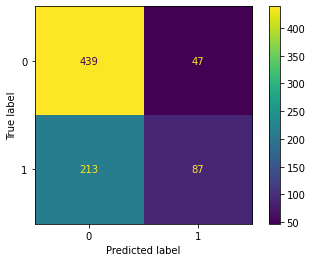

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_rf, X_val, y_val)

In [25]:
from sklearn import metrics
print(metrics.classification_report( y_val, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.673     0.903     0.772       486
           1      0.649     0.290     0.401       300

    accuracy                          0.669       786
   macro avg      0.661     0.597     0.586       786
weighted avg      0.664     0.669     0.630       786

